# Odd-Even CUDA Weak Scaling Anaylisis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [4]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/riley.szecsy/FinalProject/CUDA/CaliFiles/*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Avg time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Min GPU time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max GPU time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total GPU time"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [5]:
# Performance data
tk.dataframe

Avg GPU time/rank  \
node                                              profile                         
{'name': 'main', 'type': 'function'}              27611935            87.583490   
                                                  235370638          603.426048   
                                                  258674929            1.898404   
                                                  278147871            1.917304   
                                                  288741148           38.043049   
                                                  291542642        21906.044159   
                                                  297853830        23730.772735   
                                                  307890583            1.883261   
                                                  355590238          411.103361   
                                                  393406791           26.346162   
                                                  431648225            1.882223   
                                                  445692905        19553.993733   
                                                  448016214            2.621261   
                                                  488898877          410.809764   
                                                  587401651           26.447900   
                                                  615494200         1493.651230   
                                                  616323830            5.128897   
                                                  616935834            1.836984   
                                                  643038876            1.838471   
                                                  699211409            5.029564   
                                                  716379622         6528.565727   
                                                  787084931           26.339584   
                                                  804649137          410.454677   
                                                  899017483          410.519591   
                                                  996863554         6527.427792   
                                                  1003313036          26.417519   
                                                  1024618075         410.512000   
                                                  1108336425           1.862765   
                                                  1224317166           2.667755   
                                                  1230582801          26.326341   
                                                  1340316903        6526.693435   
                                                  1360284017       19474.991364   
                                                  1385013409         669.531977   
                                                  1397624486        1388.148125   
                                                  1418472965       10670.843231   
                                                  1578631447           5.656989   
                                                  1812589118        6528.344752   
                                                  1967944038        9603.467743   
                                                  2020446166         410.838217   
                                                  2068669443           1.865255   
                                                  2163251993           1.869019   
                                                  2178402970           6.167796   
                                                  2204364773        6527.326266   
                                                  2352517739          77.218621   
                                                  2592539158          38.572000   
                                                  2598760957          26.423208   
                                                  2602100866           2.89787

In [6]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm_small
├─ 1.000 comp_small
└─ 1.000 whole_computation
   ├─ 1.000 check_correctness
   ├─ 1.000 comm
   │  └─ 1.000 comm_large
   │     └─ 1.000 cudaMemcpy
   ├─ 1.000 comp
   │  └─ 1.000 comp_large
   └─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [7]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
27611935,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v262144-t1024-i1.cali,1701037057,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 262144, 1024, 1]",g,Odd Even Transposition Sort,CUDA,int,4,262144,Random,1024,131072,9,Online
235370638,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v1048576-t512-i0.cali,1701036353,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 1048576, 512, 0]",g,Odd Even Transposition Sort,CUDA,int,4,1048576,Sorted,512,524288,9,Online
258674929,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v65536-t256-i2.cali,1701037348,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 65536, 256, 2]",g,Odd Even Transposition Sort,CUDA,int,4,65536,ReverseSorted,256,32768,9,Online
278147871,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v65536-t256-i1.cali,1701036820,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 65536, 256, 1]",g,Odd Even Transposition Sort,CUDA,int,4,65536,Random,256,32768,9,Online
288741148,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v262144-t512-i0.cali,1701036293,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 262144, 512, 0]",g,Odd Even Transposition Sort,CUDA,int,4,262144,Sorted,512,131072,9,Online
291542642,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v4194304-t1024-i1.cali,1701091321,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 4194304, 1024, 1]",g,Odd Even Transposition Sort,CUDA,int,4,4194304,Random,1024,2097152,9,Online
297853830,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v4194304-t1024-i2.cali,1701091351,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 4194304, 1024, 2]",g,Odd Even Transposition Sort,CUDA,int,4,4194304,ReverseSorted,1024,2097152,9,Online
307890583,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v65536-t256-i3.cali,1701037637,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 65536, 256, 3]",g,Odd Even Transposition Sort,CUDA,int,4,65536,1%%pertubed,256,32768,9,Online
355590238,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v1048576-t256-i2.cali,1701038114,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./cudaoddeven, 1048576, 256, 2]",g,Odd Even Transposition Sort,CUDA,int,4,1048576,ReverseSorted,256,524288,9,Online


In [8]:
gb = tk.groupby(["InputType", "InputSize"])

16  thickets created...
{('1%%pertubed', 65536): <thicket.thicket.Thicket object at 0x2b73935f40a0>, ('1%%pertubed', 262144): <thicket.thicket.Thicket object at 0x2b7393490d30>, ('1%%pertubed', 1048576): <thicket.thicket.Thicket object at 0x2b739342a280>, ('1%%pertubed', 4194304): <thicket.thicket.Thicket object at 0x2b739328fcd0>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2b7393264e80>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2b7393527400>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2b739362ad90>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2b739365da90>, ('ReverseSorted', 65536): <thicket.thicket.Thicket object at 0x2b73936448b0>, ('ReverseSorted', 262144): <thicket.thicket.Thicket object at 0x2b7393c9be20>, ('ReverseSorted', 1048576): <thicket.thicket.Thicket object at 0x2b73932ac700>, ('ReverseSorted', 4194304): <thicket.thicket.Thicket object at 0x2b73932c06a0>, ('Sorted', 65536): <thicket.thicket.Thicket object at 0x2b73

Compose these 3 groups column-wise to get a holistic view of the data

In [9]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [10]:
ctk.dataframe

(1%%pertubed, 65536)  \
                                                                 Avg GPU time/rank   
node                                              num_threads                        
{'name': 'main', 'type': 'function'}              64                      1.838471   
                                                  128                     1.862765   
                                                  256                     1.883261   
                                                  512                     2.667755   
                                                  1024                    5.128897   
{'name': 'comm_small', 'type': 'function'}        64                           NaN   
                                                  128                          NaN   
                                                  256                          NaN   
                                                  512                          NaN   
                                                  1024                         NaN   
{'name': 'comp_small', 'type': 'function'}        64                           NaN   
                                                  128                          NaN   
                                                  256                          NaN   
                                                  512                          NaN   
                                                  1024                         NaN   
{'name': 'whole_computation', 'type': 'function'} 64                      1.838471   
                                                  128                     1.862765   
                                                  256                     1.883261   
                                                  512                     2.667755   
                                                  1024                    5.128897   
{'name': 'check_correctness', 'type': 'function'} 64                           NaN   
                                                  128                          NaN   
                                                  256                          NaN   
                                                  512                          NaN   
                                                  1024                         NaN   
{'name': 'comm', 'type': 'function'}              64                      0.000046   
                                                  128                     0.000047   
                                                  256                     0.000047   
                                                  512                     0.000046   
                                                  1024                    0.000046   
{'name': 'comm_large', 'type': 'function'}        64                      0.000046   
                                                  128                     0.000047   
                                                  256                     0.000047   
                                                  512                     0.000046   
                                                  1024                    0.000046   
{'name': 'cudaMemcpy', 'type': 'function'}        64                      0.000046   
                                                  128                     0.000047   
                                                  256                     0.000047   
                                                  512                     0.000046   
                                                  1024                    0.000046   
{'name': 'comp', 'type': 'function'}              64                      1.838425   
                                                  128                     1.862718   
                                                  256                     1.883215   
                                                  512                     2.667708   
                    

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [15]:
ctk.dataframe

(1%%pertubed, 65536) (1%%pertubed, 262144)  \
                                 Avg GPU time/rank     Avg GPU time/rank   
name              num_threads                                              
main              64                      1.838471             26.326341   
                  128                     1.862765             26.339584   
                  256                     1.883261             26.423208   
                  512                     2.667755             38.572000   
                  1024                    5.128897             78.559284   
comm_small        64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
comp_small        64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
whole_computation 64                      1.838471             26.326341   
                  128                     1.862765             26.339584   
                  256                     1.883261             26.423208   
                  512                     2.667755             38.572000   
                  1024                    5.128897             78.559284   
check_correctness 64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
comm              64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
comm_large        64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
cudaMemcpy        64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
comp              64                      1.838425             26.326170   
                  128                     1.862718             26.339413   
                  256                     1.883215             26.423036   
                  512                     2.667708             38.571828   
                  1024                    5.128851             78.559113   
comp_large        64                      1.838425             26.326170   
                  128                     1.862718             26.339413   
                  256                     1.883215             26.423036   
                  512                     2.667708             38.571828   
                  1024                    5.128851             78.559113   
da

In [16]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [17]:
ctk.dataframe

(1%%pertubed, 65536) (1%%pertubed, 262144)  \
                                 Avg GPU time/rank     Avg GPU time/rank   
name              num_threads                                              
main              64                      1.838471             26.326341   
                  128                     1.862765             26.339584   
                  256                     1.883261             26.423208   
                  512                     2.667755             38.572000   
                  1024                    5.128897             78.559284   
comm_small        64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
comp_small        64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
whole_computation 64                      1.838471             26.326341   
                  128                     1.862765             26.339584   
                  256                     1.883261             26.423208   
                  512                     2.667755             38.572000   
                  1024                    5.128897             78.559284   
check_correctness 64                           NaN                   NaN   
                  128                          NaN                   NaN   
                  256                          NaN                   NaN   
                  512                          NaN                   NaN   
                  1024                         NaN                   NaN   
comm              64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
comm_large        64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
cudaMemcpy        64                      0.000046              0.000171   
                  128                     0.000047              0.000172   
                  256                     0.000047              0.000172   
                  512                     0.000046              0.000172   
                  1024                    0.000046              0.000171   
comp              64                      1.838425             26.326170   
                  128                     1.862718             26.339413   
                  256                     1.883215             26.423036   
                  512                     2.667708             38.571828   
                  1024                    5.128851             78.559113   
comp_large        64                      1.838425             26.326170   
                  128                     1.862718             26.339413   
                  256                     1.883215             26.423036   
                  512                     2.667708             38.571828   
                  1024                    5.128851             78.559113   
da

# Plotting (From the lab 1 example)

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [18]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [19]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

In [20]:
ctk.dataframe.loc["main"]

,"(1%%pertubed, 65536)","(1%%pertubed, 262144)","(1%%pertubed, 1048576)","(1%%pertubed, 4194304)","(Random, 65536)","(Random, 262144)","(Random, 1048576)","(Random, 4194304)","(ReverseSorted, 65536)","(ReverseSorted, 262144)","(ReverseSorted, 1048576)","(ReverseSorted, 4194304)","(Sorted, 65536)","(Sorted, 262144)","(Sorted, 1048576)","(Sorted, 4194304)"
,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank
num_threads,,,,,,,,,,,,,,,,
64,1.838471,26.326341,410.519591,6527.427792,1.865255,26.417519,410.838217,6528.227515,1.943928,26.552186,411.371364,6530.998415,1.870038,26.302022,410.454677,6527.269083
128,1.862765,26.339584,410.457639,6526.693435,1.869019,26.346162,410.412782,6528.177369,1.836984,26.333946,410.512000,6527.326266,1.846379,26.322440,410.411435,6527.641761
256,1.883261,26.423208,410.873402,6528.233199,1.917304,26.428923,410.863285,6528.565727,1.898404,26.452117,411.103361,6529.324783,1.882223,26.447900,410.809764,6528.344752
512,2.667755,38.572000,604.273049,9611.247715,2.897876,42.615720,669.531977,10670.843231,3.106077,45.131017,710.051711,11288.821736,2.621261,38.043049,603.426048,9603.467743
1024,5.128897,78.559284,1225.970437,19553.993733,5.656989,87.583490,1388.148125,21906.044159,6.167796,93.278724,1493.651230,23730.772735,5.029564,77.218621,1205.343124,19474.991364


In [21]:
#Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


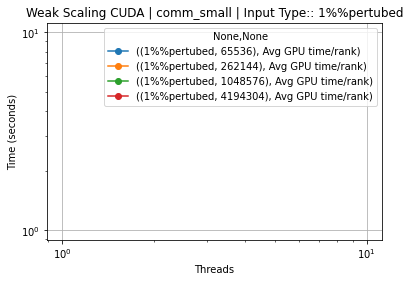

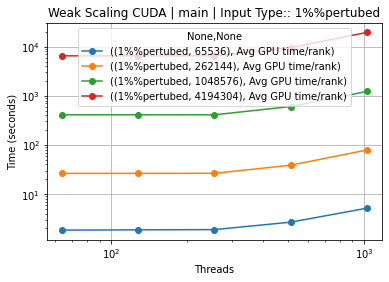

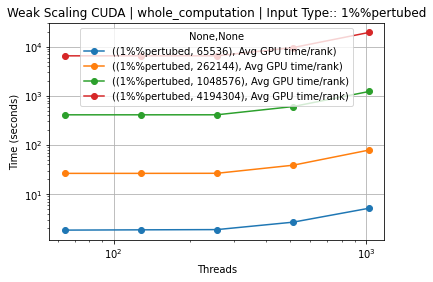

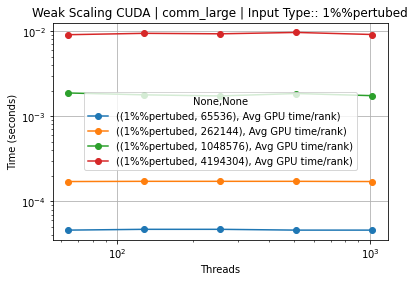

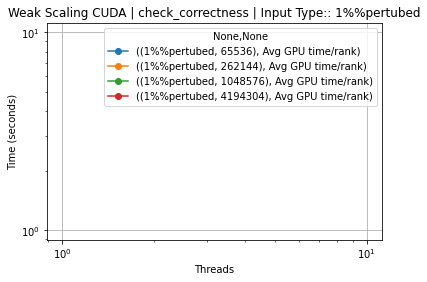

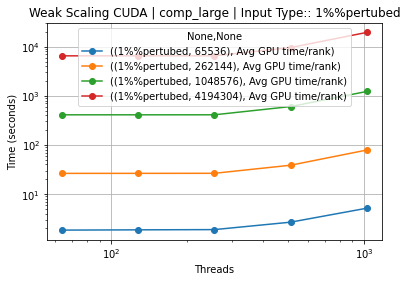

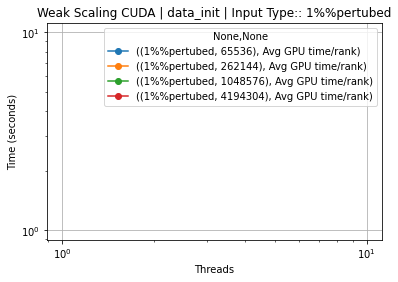

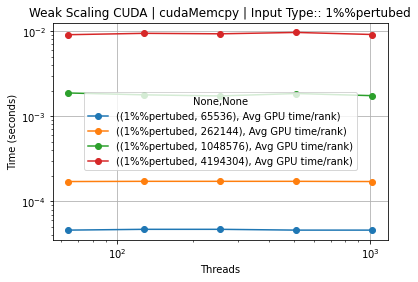

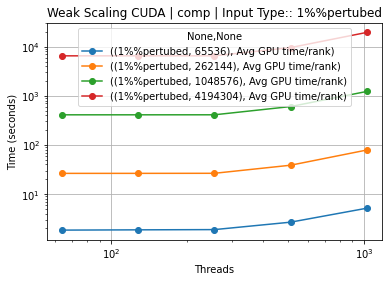

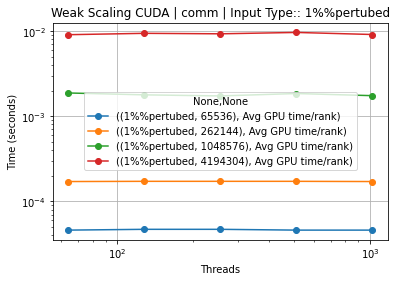

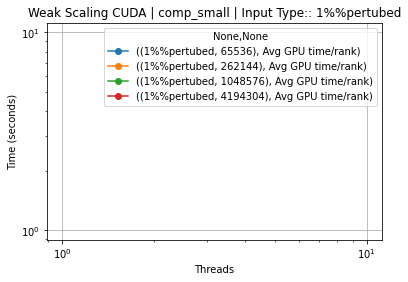

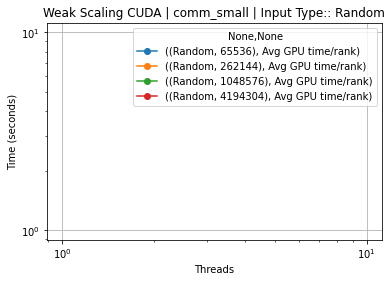

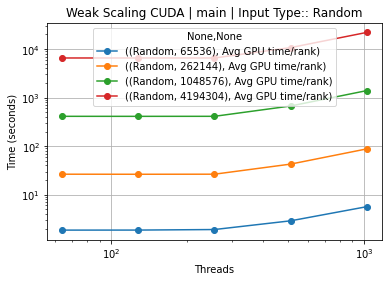

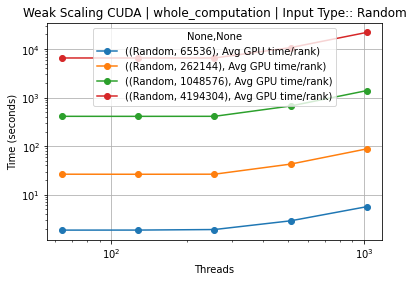

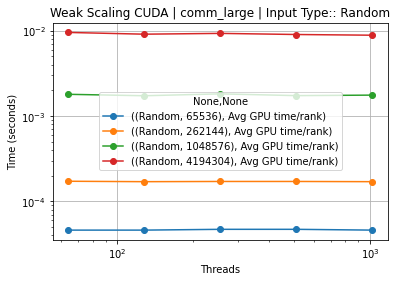

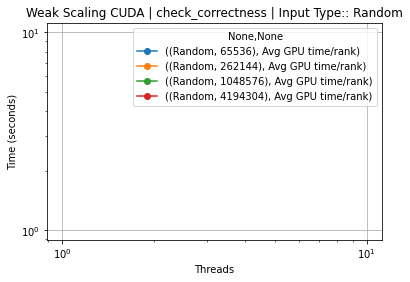

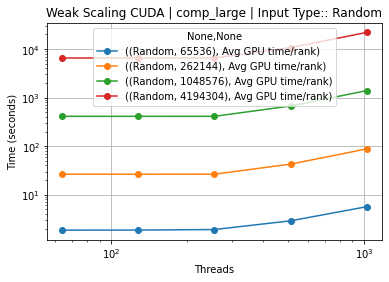

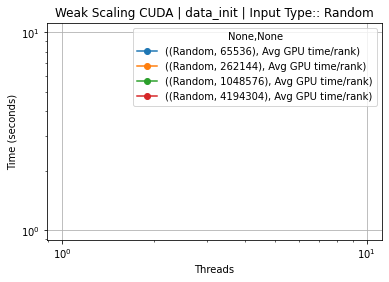

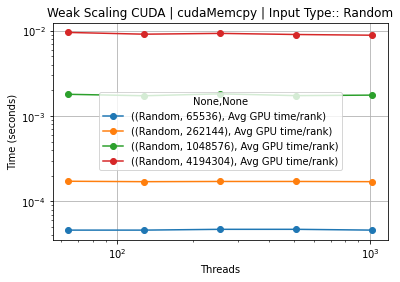

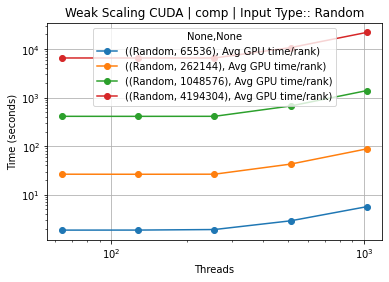

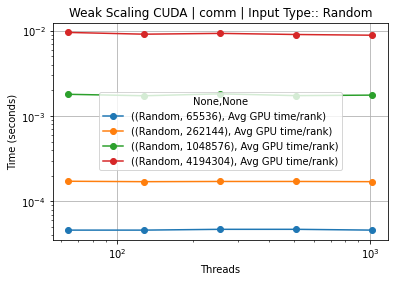

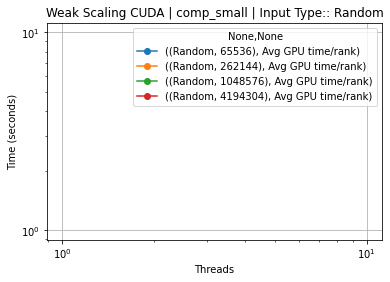

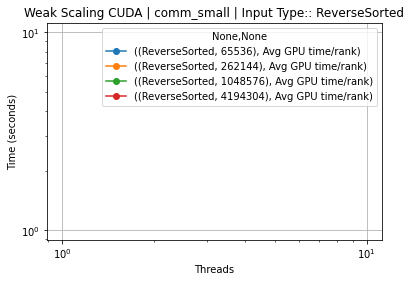

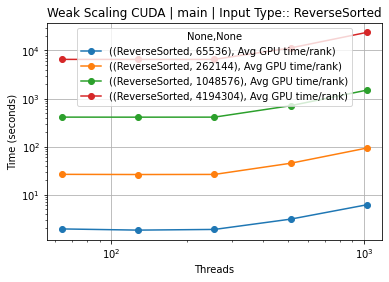

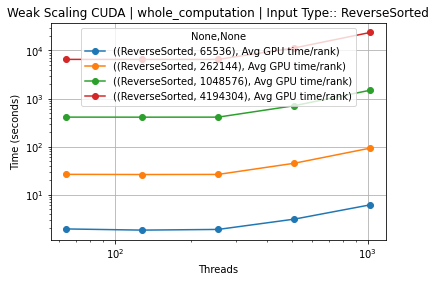

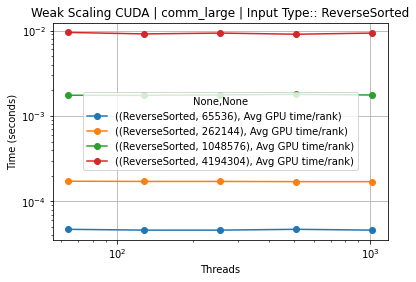

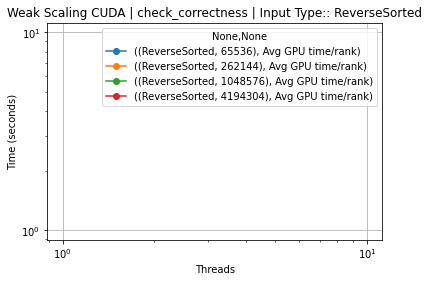

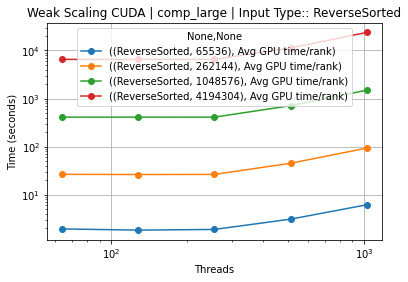

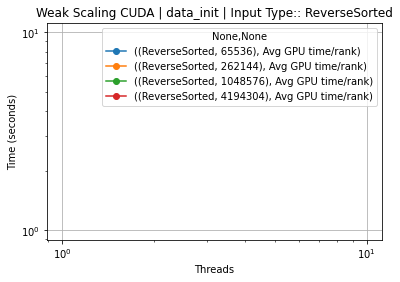

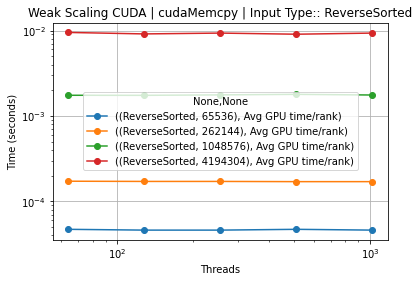

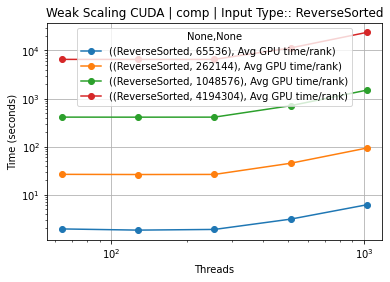

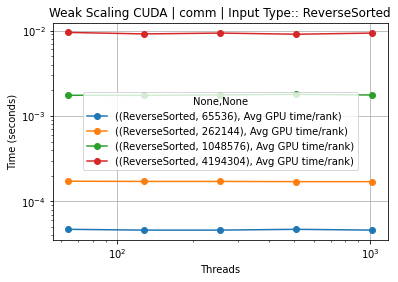

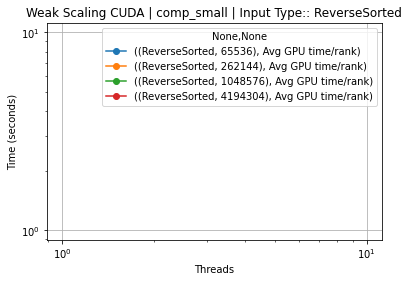

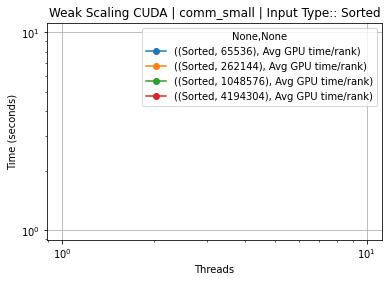

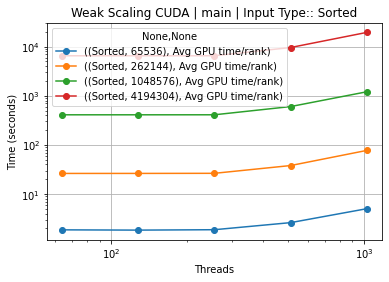

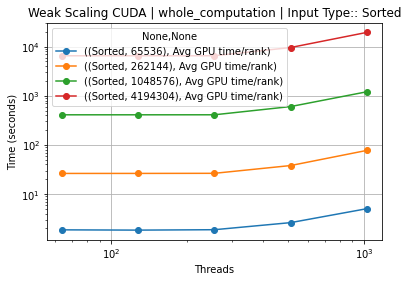

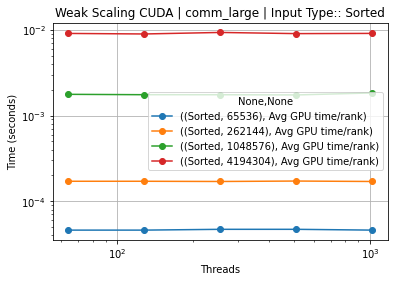

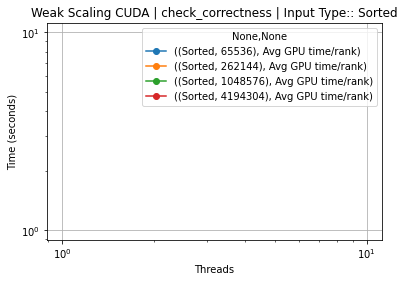

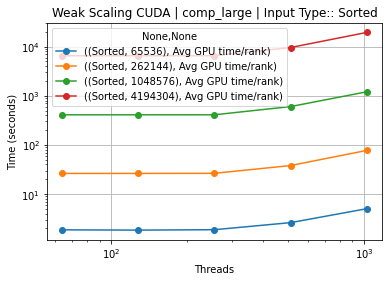

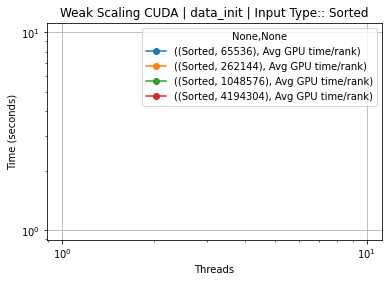

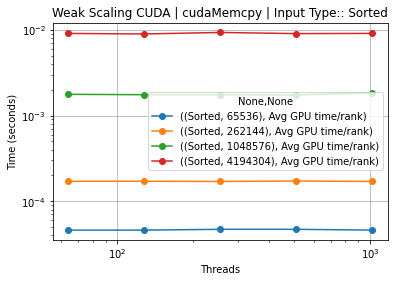

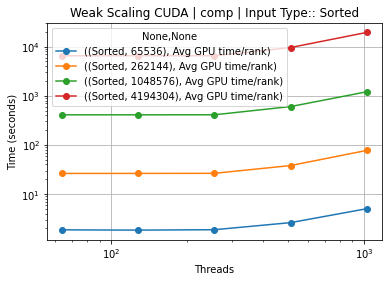

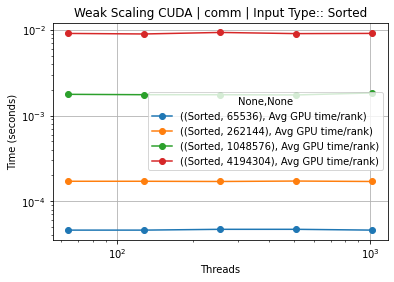

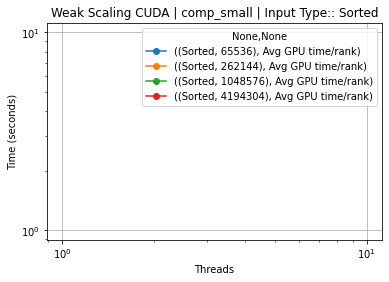

In [26]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg GPU time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot_pandas(
            df=test.loc[name],
            title=f"Weak Scaling CUDA | {name} | Input Type:: {intype}",
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

In [24]:
ctk.dataframe.columns.get_level_values(0)

Index([    ('1%%pertubed', 65536),    ('1%%pertubed', 262144),
         ('1%%pertubed', 1048576),   ('1%%pertubed', 4194304),
                ('Random', 65536),         ('Random', 262144),
              ('Random', 1048576),        ('Random', 4194304),
         ('ReverseSorted', 65536),  ('ReverseSorted', 262144),
       ('ReverseSorted', 1048576), ('ReverseSorted', 4194304),
                ('Sorted', 65536),         ('Sorted', 262144),
              ('Sorted', 1048576),        ('Sorted', 4194304)],
      dtype='object')